# Exploration

- [Exploration](#Exploration)
- [Categorical v. Continuous](#Categorical-v.-Continuous)
- [Survived against Categorical Features](#Survived-against-Categorical-Features)
- [Treat our target as a number](#Treat-our-target-as-a-number)

- explore the target against independent

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import acquire as ac
import sklearn.model_selection

In [2]:
df = ac.get_titanic_data()

In [3]:
train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size=.8)

In [4]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
329,329,1,1,female,16.0,0,1,57.9792,C,First,B,Cherbourg,0
749,749,0,3,male,31.0,0,0,7.7500,Q,Third,None,Queenstown,1
203,203,0,3,male,45.5,0,0,7.2250,C,Third,None,Cherbourg,1
421,421,0,3,male,21.0,0,0,7.7333,Q,Third,None,Queenstown,1
97,97,1,1,male,23.0,0,1,63.3583,C,First,D,Cherbourg,0


In [5]:
train = train.drop(columns=["passenger_id", "embarked", "class", "deck"])

In [6]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
329,1,1,female,16.0,0,1,57.9792,Cherbourg,0
749,0,3,male,31.0,0,0,7.7500,Queenstown,1
203,0,3,male,45.5,0,0,7.2250,Cherbourg,1
421,0,3,male,21.0,0,0,7.7333,Queenstown,1
97,1,1,male,23.0,0,1,63.3583,Cherbourg,0
...,...,...,...,...,...,...,...,...,...
98,1,2,female,34.0,0,1,23.0000,Southampton,0
322,1,2,female,30.0,0,0,12.3500,Queenstown,1
382,0,3,male,32.0,0,0,7.9250,Southampton,1
365,0,3,male,30.0,0,0,7.2500,Southampton,1


## Categorical v. Continuous

- boxplot
- swarmplot
- violinplot

variables:
- age
- fare

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rc?

In [9]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=13)

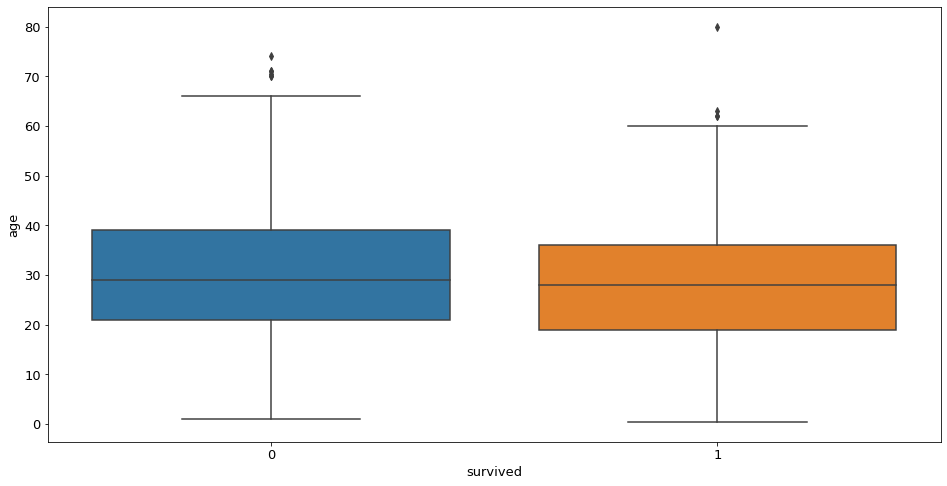

In [10]:
sns.boxplot(x="survived", y="age", data=train)

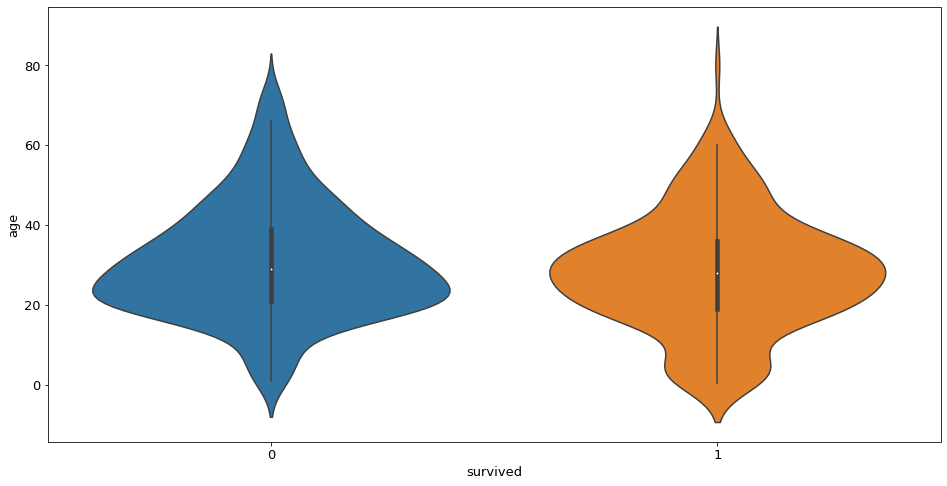

In [11]:
# fast visualization
sns.violinplot(x="survived", y="age", data=train)

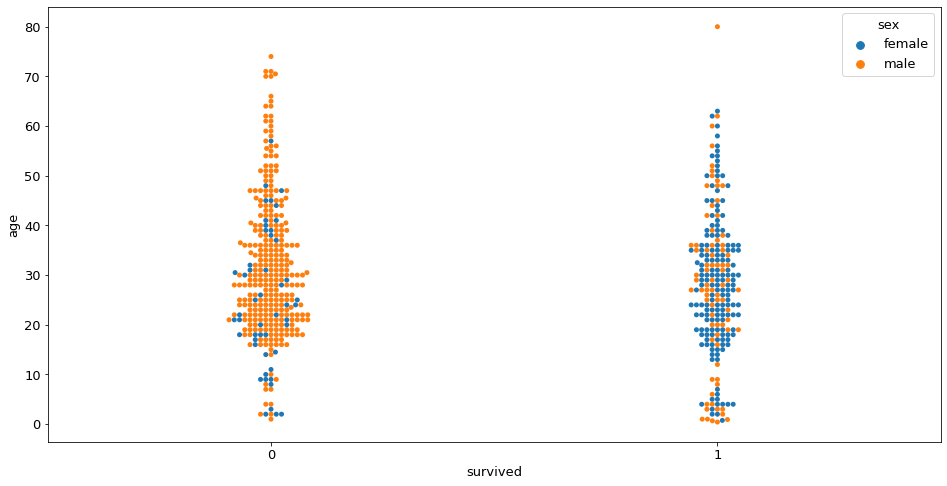

In [12]:
# more informative
sns.swarmplot(x="survived", y="age", data=train, hue="sex")

> Takeaway:

> Looks like there are more children who survived than perished. This information wasn't as evident in the boxplot.

> More women survived than men

survived
0    22.501635
1    47.914547
Name: fare, dtype: float64


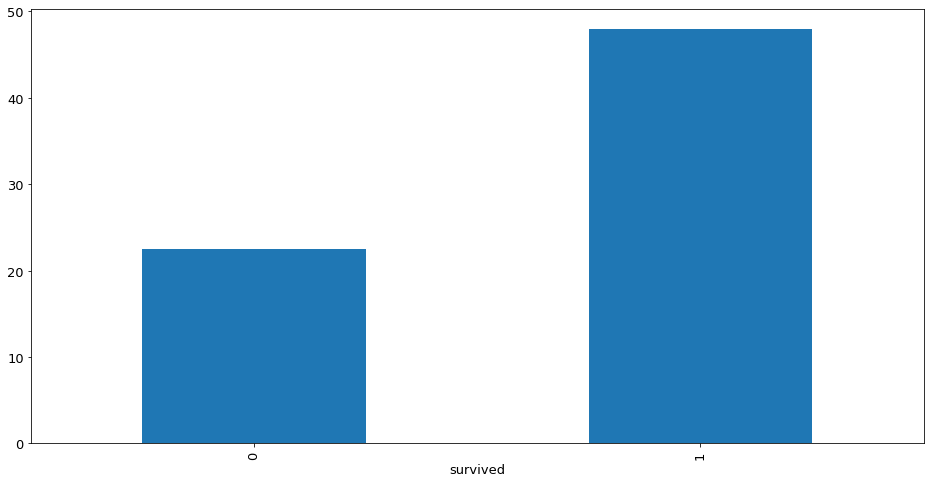

In [13]:
# with a pandas series, .plot.bar will turn the index into xlabels,  and the values into bar heights
s = train.groupby("survived").fare.mean()
print(s)
s.plot.bar()

In [14]:
stats.ttest_ind(
    train[train.survived == 1].fare,
    train[train.survived == 0].fare
)

Ttest_indResult(statistic=6.512874301818937, pvalue=1.3955507135677185e-10)

> Takeaway:

> Those that survived paid more for their tickets

> Question: How does class play into survival rate?

> Question: How does sex interact with fare?

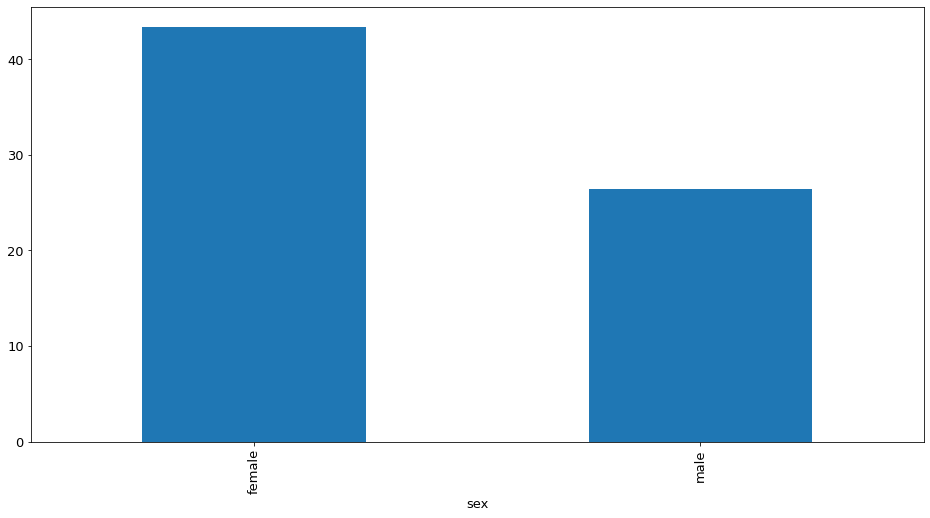

In [15]:
train.groupby("sex").fare.mean().plot.bar()

> Question: Distributuon of men an women based on class

## Survived against Categorical Features

In [16]:
ctab = pd.crosstab(train.survived, train.pclass)
ctab

pclass,1,2,3
survived,,,
0,61,79,295
1,105,70,102


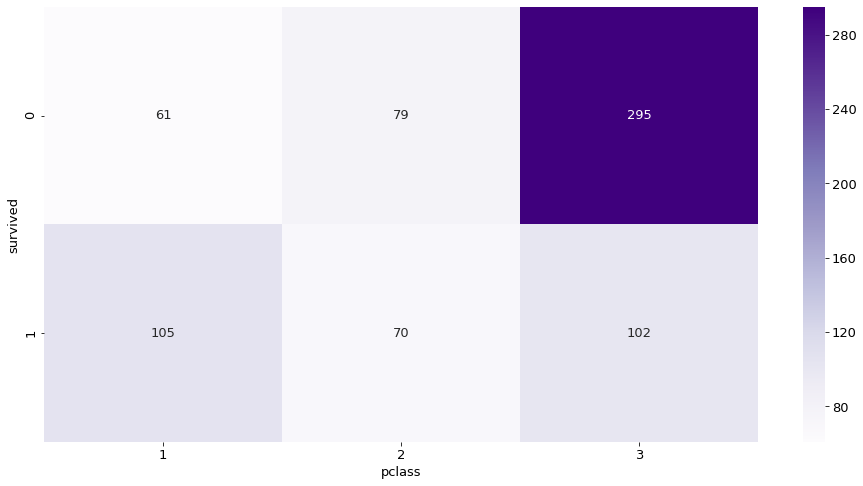

In [17]:
sns.heatmap(ctab, annot=True, cmap="Purples", fmt="d")

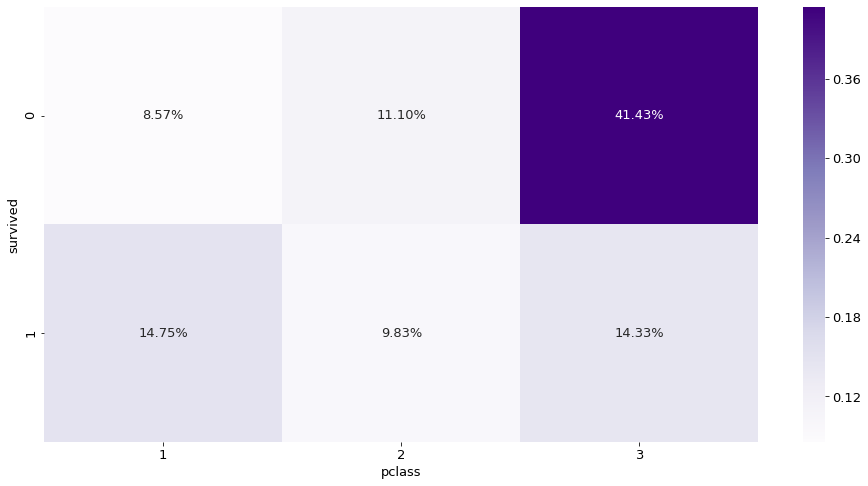

In [18]:
ctab = pd.crosstab(train.survived, train.pclass, normalize=True)
sns.heatmap(ctab, annot=True, cmap="Purples", fmt=".2%")

> Takeaway:

> There are more people in third class than any other

> The survival rate is higher for first class than third class

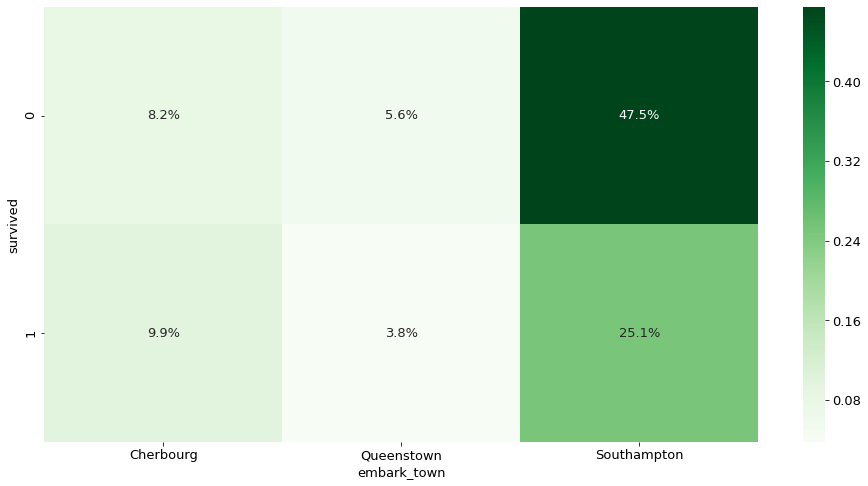

In [19]:
ctab = pd.crosstab(train.survived, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap="Greens", fmt=".1%")

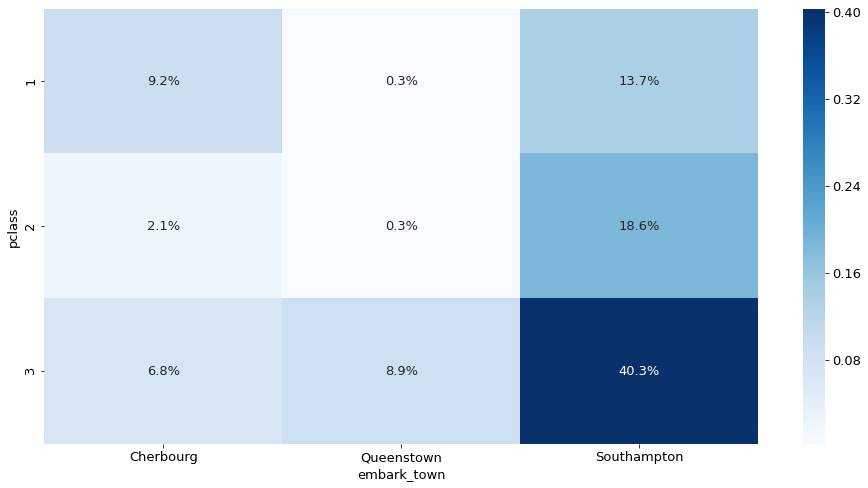

In [20]:
ctab = pd.crosstab(train.pclass, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap="Blues", fmt=".1%")

## Treat our target as a number

Survived is a 1 or 0, this has some nice properties
- The sum is the number people survived
- The mean is the survival rate
- This applies to subgroups

In [21]:
train.shape[0]

712

In [22]:
train.survived.sum()

277

In [23]:
train.survived.mean()

0.3890449438202247